# **Data Visualization**
#### This IPython notebook visualizes various aspects of transcription data, including word counts, sentiment distribution, speaker participation, named entity occurrences, and trends over time. The visualizations are intended to provide insightful analysis of the transcription data and facilitate the understanding of speech patterns, sentiment, and important entities mentioned throughout the conversation.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# pandas is used to handle and manipulate data, especially for reading and working with CSV files.
# matplotlib is used for creating visualizations, such as bar plots, histograms, and line graphs.
# WordCloud is used to create word clouds, which visually represent the frequency of words in a dataset.

## 1. Word Count Histogram per 5-Second Bucket
####   Displays the total word count within each 5-second time bucket to show speech concentration over time.

## 2. Sentiment Distribution
####   Shows the count of transcription segments classified into positive, negative, and neutral sentiments.

## 3. Word Count per Speaker
####   Represents the total word count spoken by each speaker, highlighting their contribution to the conversation.

## 4. Word Count Distribution (Histogram)
####   Plots the distribution of word counts across all transcription segments, indicating the length of each segment.

## 5. Sentiment Trend Over Time
####   Depicts the average sentiment trend over time, showing how sentiment changes across 5-second intervals.

## 6. Word Cloud for Transcription Text
####   A word cloud displaying the most frequent words in the transcriptions, with larger words representing higher frequencies.

In [2]:
csv_file = "/kaggle/input/csv-output/video_convo.csv"

# ** Word Count Histogram per 5-Second Bucket**
#### * Purpose: This histogram shows the total word count accumulated in each 5-second interval. It helps visualize the intensity or density of speech at different points in time. By grouping the words into time buckets, you can easily observe when more or less talking occurs, highlighting patterns of activity throughout the conversation.
#### * Type of Plot: Bar plot
#### * X-Axis: Elapsed Time (seconds) divided into 5-second intervals (e.g., 0-5, 5-10, 10-15, etc.)
#### * Y-Axis: Total Word Count in each 5-second interval.
#### * Interpretation: Higher bars represent more words spoken in a given 5-second period, while lower bars indicate quieter moments or pauses in the conversation. This could be useful for identifying key speaking moments or lulls.

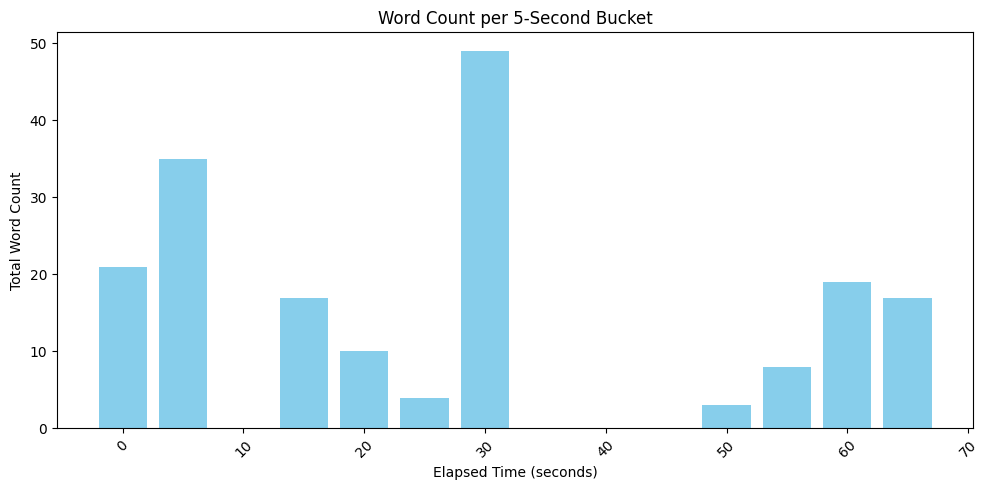

In [3]:
# Function to generate the word count histogram per 5-second bucket
def plot_word_count_histogram(csv_file):
    # Read the CSV data into a DataFrame
    df = pd.read_csv(csv_file)
    # Calculate the total word count per 5-second bucket
    bucket_counts = df.groupby("bucket_start")["word_count"].sum()
    # Plot the histogram
    plt.figure(figsize=(10, 5))
    plt.bar(bucket_counts.index, bucket_counts.values, width=4, color='skyblue')
    plt.xlabel("Elapsed Time (seconds)")
    plt.ylabel("Total Word Count")
    plt.title("Word Count per 5-Second Bucket")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_word_count_histogram(csv_file)

# **Sentiment Distribution**
#### * Purpose: This bar chart visualizes the sentiment classification of the transcription segments. Each segment is classified as positive, negative, or neutral based on the sentiment analysis performed using VADER (Valence Aware Dictionary and sEntiment Reasoner).
#### * Type of Plot: Bar plot
#### * X-Axis: Sentiment labels (positive, neutral, negative)
#### * Y-Axis: Count of segments for each sentiment.
#### * Interpretation: The bar chart gives a clear view of the overall emotional tone of the conversation. A larger bar for "positive" sentiment would suggest a generally optimistic or favorable conversation, while more "negative" sentiment bars would indicate dissatisfaction, frustration, or negative emotions. The "neutral" category represents more neutral or objective content.

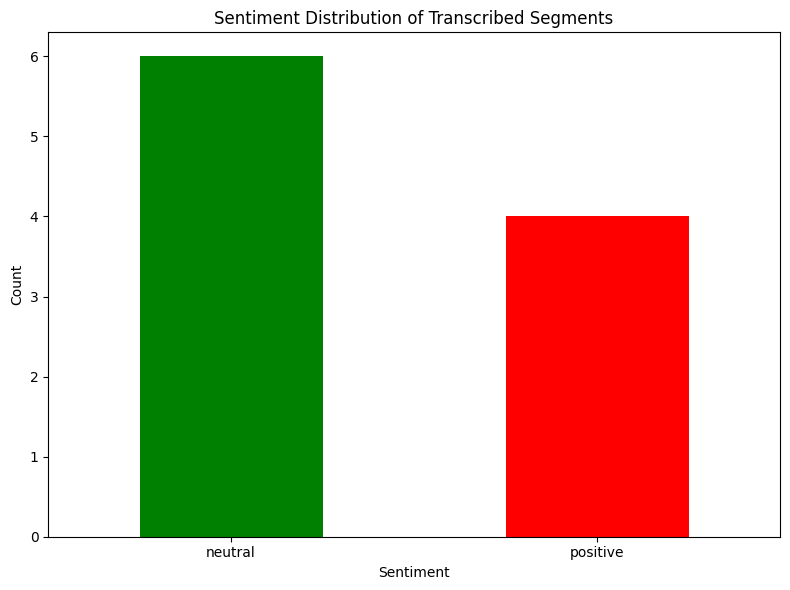

In [4]:
# Function to generate the sentiment classification plot
def plot_sentiment_distribution(csv_file):
    # Read the CSV data into a DataFrame
    df = pd.read_csv(csv_file)

    # Count the occurrences of each sentiment label
    sentiment_counts = df['sentiment'].value_counts()

    # Plot the sentiment distribution
    plt.figure(figsize=(8, 6))
    sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])
    plt.xlabel("Sentiment")
    plt.ylabel("Count")
    plt.title("Sentiment Distribution of Transcribed Segments")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()
plot_sentiment_distribution(csv_file)

# **Word Count per Speaker**
#### * Purpose: This bar chart illustrates the total word count contributed by each speaker in the transcription. It shows how much each speaker participated in the conversation in terms of word volume.
#### * Type of Plot: Bar plot
#### * X-Axis: Speaker labels (e.g., Speaker 1, Speaker 2, etc.)
#### * Y-Axis: Number of words spoken by each speaker.
#### * Interpretation: The length of each bar represents how many words each speaker spoke. Longer bars for a speaker indicate they were more active in the conversation. This graph could help identify dominant speakers, or it could be used to check if the conversation was balanced or if one speaker dominated the discussion.

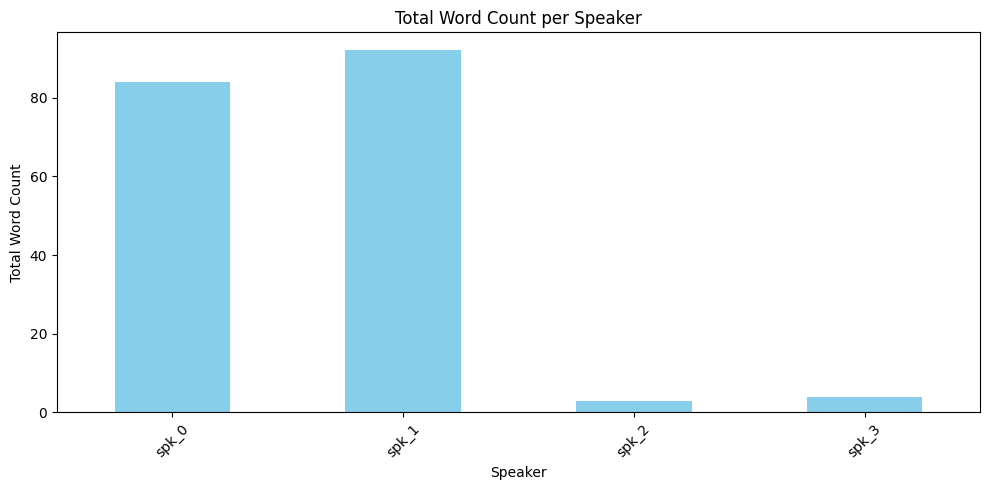

In [5]:
# Function to visualize total word count per speaker
def plot_word_count_per_speaker(csv_file):
    # Read the CSV data into a DataFrame
    df = pd.read_csv(csv_file)

    # Calculate total word count per speaker
    speaker_word_counts = df.groupby("speaker")["word_count"].sum()

    # Plot the word count per speaker
    plt.figure(figsize=(10, 5))
    speaker_word_counts.plot(kind='bar', color='skyblue')
    plt.xlabel("Speaker")
    plt.ylabel("Total Word Count")
    plt.title("Total Word Count per Speaker")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
plot_word_count_per_speaker(csv_file)

# **Word Count Distribution**
#### * Purpose: This histogram represents the distribution of the word counts per transcription segment. It shows how long each segment of speech is in terms of words.
#### * Type of Plot: Histogram
#### * X-Axis: Word count per segment.
#### * Y-Axis: Frequency of transcription segments with the corresponding word count.
#### * Interpretation: The x-axis represents the word count per segment, while the y-axis represents how many segments fall into each word count range. This graph gives insight into the length of the conversation's segments. If most segments are clustered around a low word count, the conversation may have been brief or fragmented. If there are a lot of high word count segments, the conversation may have been longer or more detailed.

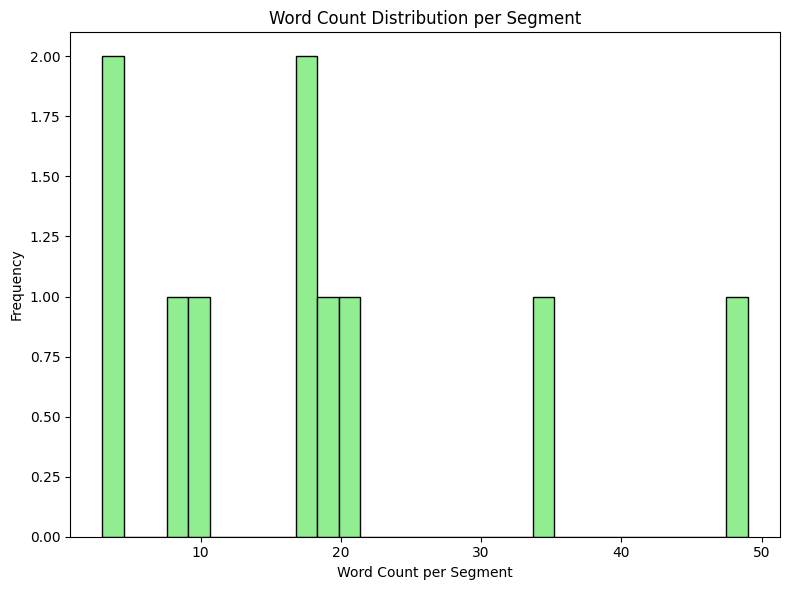

In [6]:
# Function to visualize word count distribution (histogram)
def plot_word_count_distribution(csv_file):
    # Read the CSV data into a DataFrame
    df = pd.read_csv(csv_file)

    # Plot a histogram of word counts
    plt.figure(figsize=(8, 6))
    df['word_count'].plot(kind='hist', bins=30, color='lightgreen', edgecolor='black')
    plt.xlabel("Word Count per Segment")
    plt.ylabel("Frequency")
    plt.title("Word Count Distribution per Segment")
    plt.tight_layout()
    plt.show()
plot_word_count_distribution(csv_file)

# **Sentiment Trend Over Time**
#### * Purpose: This line graph shows how the overall sentiment of the transcription changes over time, with each 5-second bucket representing a data point. It uses the numeric sentiment values (positive, neutral, negative) to track the trend.
#### * Type of Plot: Line plot
#### * X-Axis: Elapsed Time (seconds) divided into 5-second intervals.
#### * Y-Axis: Average Sentiment value (Negative to Positive).
#### * Interpretation: The line on the graph represents the sentiment trend. A higher positive value means more positive sentiment during that time, while a negative value reflects more negative sentiment. If the sentiment fluctuates up and down, it indicates that the mood of the conversation is changing dynamically. This graph can be useful for identifying key emotional shifts during the conversation, such as moments of agreement, disagreement, or emotional intensity.

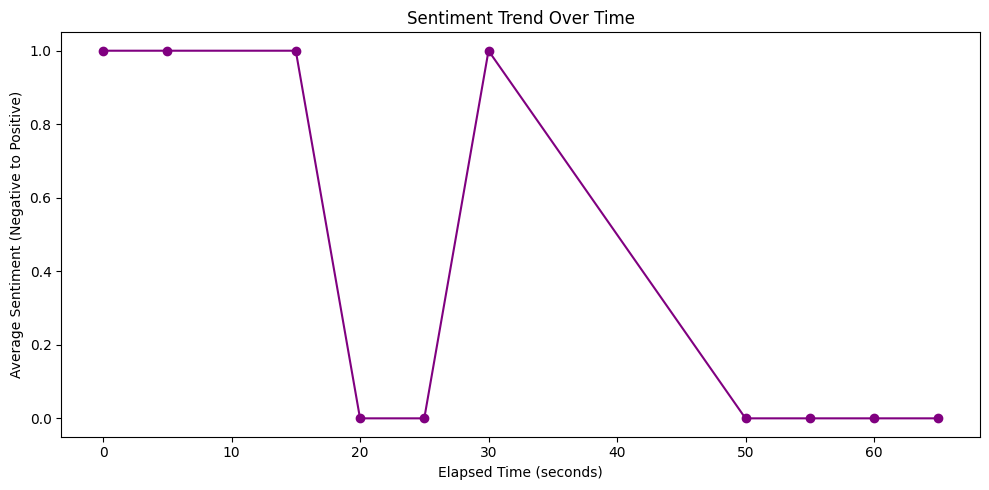

In [7]:
# Function to visualize sentiment trend over time (based on buckets)
def plot_sentiment_trend(csv_file):
    # Read the CSV data into a DataFrame
    df = pd.read_csv(csv_file)

    # Map sentiment to numeric values for easier plotting
    sentiment_map = {"positive": 1, "neutral": 0, "negative": -1}
    df['sentiment_value'] = df['sentiment'].map(sentiment_map)

    # Calculate average sentiment for each 5-second bucket
    sentiment_trend = df.groupby("bucket_start")["sentiment_value"].mean()

    # Plot the sentiment trend over time
    plt.figure(figsize=(10, 5))
    plt.plot(sentiment_trend.index, sentiment_trend.values, color='purple', marker='o')
    plt.xlabel("Elapsed Time (seconds)")
    plt.ylabel("Average Sentiment (Negative to Positive)")
    plt.title("Sentiment Trend Over Time")
    plt.tight_layout()
    plt.show()
plot_sentiment_trend(csv_file)

# **Word Cloud for Transcription Text**
#### * Purpose: A word cloud visually represents the most frequent words in the transcription. Words that appear more frequently are shown in a larger font size, while less frequent words are shown smaller.
#### * Type of Plot: Word Cloud
#### * X-Axis: Not applicable (visual representation based on word frequency).
#### * Y-Axis: Not applicable (visual representation based on word frequency).
#### * Interpretation: This visualization allows you to quickly identify key themes or subjects discussed in the conversation. Words that stand out in larger fonts represent the most discussed topics. For example, if the word "project" appears in a large font, it suggests that much of the conversation was focused on that topic. This type of graph is helpful for gaining a quick understanding of the primary content of the transcription without reading through it.

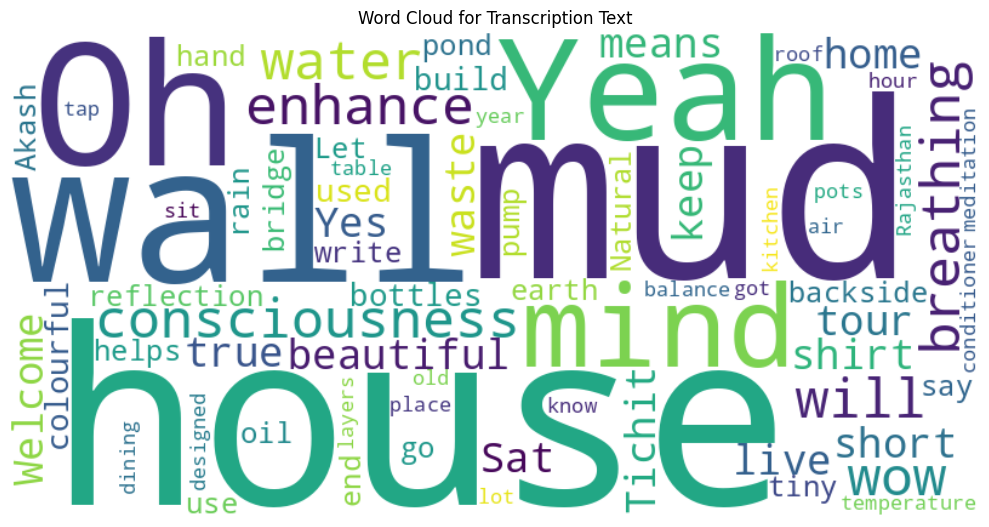

In [8]:
# Function to generate a word cloud from all text
def plot_word_cloud(csv_file):
    # Read the CSV data into a DataFrame
    df = pd.read_csv(csv_file)

    # Combine all the transcription text
    text = " ".join(df['text'].dropna())

    # Create the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Plot the word cloud
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Word Cloud for Transcription Text")
    plt.tight_layout()
    plt.show()
plot_word_cloud(csv_file)